# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Crudele

Student name: Michele Maria
    
ID: 2021858

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 4223432413
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)
for i in range(10):
    if np.count_nonzero(y_train == i) < 10:
        print("Add permutations")

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [56 57 57 67 59 60 58 58 62 66]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


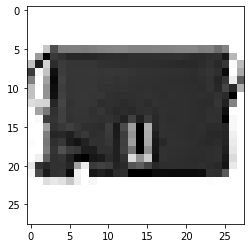

LABEL: 8
INPUT:


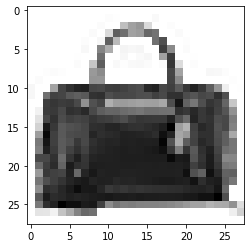

LABEL: 8
INPUT:


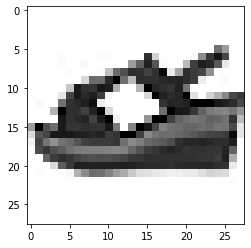

LABEL: 5
INPUT:


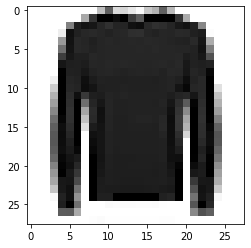

LABEL: 2


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM

svc = SVC(kernel='linear')
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("\nBest parameters set found:")
print(clf.best_params_)

print("\nScore with best parameters:")
linear_score=clf.best_score_
print(linear_score)

print("\nAll scores on the grid:")
print('-split0_test_score:', clf.cv_results_['split0_test_score'])
print('-split1_test_score:', clf.cv_results_['split1_test_score'])
print('-split2_test_score:', clf.cv_results_['split2_test_score'])
print('-split3_test_score:', clf.cv_results_['split3_test_score'])
print('-mean_test_score:', clf.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 0.1}

Score with best parameters:
0.7716666666666667

All scores on the grid:
-split0_test_score: [0.52666667 0.75333333 0.76666667 0.76       0.76       0.76      ]
-split1_test_score: [0.54       0.76       0.78       0.76666667 0.76666667 0.76666667]
-split2_test_score: [0.55333333 0.74       0.76666667 0.77333333 0.77333333 0.77333333]
-split3_test_score: [0.54       0.74       0.77333333 0.74666667 0.74666667 0.74666667]
-mean_test_score: [0.54       0.74833333 0.77166667 0.76166667 0.76166667 0.76166667]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
svc = SVC(kernel='poly', degree=2)
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("\nBest parameters set found:")
print(clf.best_params_)

print("\nScore with best parameters:")
poly2_score=clf.best_score_
print(poly2_score)

print("\nAll scores on the grid:")
print('-split0_test_score:', clf.cv_results_['split0_test_score'])
print('-split1_test_score:', clf.cv_results_['split1_test_score'])
print('-split2_test_score:', clf.cv_results_['split2_test_score'])
print('-split3_test_score:', clf.cv_results_['split3_test_score'])
print('-mean_test_score:', clf.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 0.05, 'gamma': 0.5}

Score with best parameters:
0.7633333333333333

All scores on the grid:
-split0_test_score: [0.74666667 0.75333333 0.75333333 0.75333333 0.75333333 0.75333333
 0.75333333 0.75333333 0.75333333]
-split1_test_score: [0.70666667 0.78       0.78       0.79333333 0.78       0.78
 0.78       0.78       0.78      ]
-split2_test_score: [0.68666667 0.77333333 0.77333333 0.74       0.77333333 0.77333333
 0.77333333 0.77333333 0.77333333]
-split3_test_score: [0.68666667 0.74666667 0.74       0.76       0.74       0.74
 0.74666667 0.74       0.74      ]
-mean_test_score: [0.70666667 0.76333333 0.76166667 0.76166667 0.76166667 0.76166667
 0.76333333 0.76166667 0.76166667]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
svc = SVC(kernel='poly', degree=4)
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', 4, ' KERNEL')

print("\nBest parameters set found:")
print(clf.best_params_)

print("\nScore with best parameters:")
poly4_score=clf.best_score_
print(poly4_score)

print("\nAll scores on the grid:")
print('-split0_test_score:', clf.cv_results_['split0_test_score'])
print('-split1_test_score:', clf.cv_results_['split1_test_score'])
print('-split2_test_score:', clf.cv_results_['split2_test_score'])
print('-split3_test_score:', clf.cv_results_['split3_test_score'])
print('-mean_test_score:', clf.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE= 4  KERNEL

Best parameters set found:
{'C': 0.5, 'gamma': 0.05}

Score with best parameters:
0.7050000000000001

All scores on the grid:
-split0_test_score: [0.69333333 0.70666667 0.70666667 0.72666667 0.70666667 0.70666667
 0.70666667 0.70666667 0.70666667]
-split1_test_score: [0.74       0.72       0.72       0.72666667 0.72       0.72
 0.74       0.72       0.72      ]
-split2_test_score: [0.66666667 0.64666667 0.64666667 0.64666667 0.64666667 0.64666667
 0.65333333 0.64666667 0.64666667]
-split3_test_score: [0.7        0.67333333 0.67333333 0.72       0.67333333 0.67333333
 0.68       0.67333333 0.67333333]
-mean_test_score: [0.7        0.68666667 0.68666667 0.705      0.68666667 0.68666667
 0.695      0.68666667 0.68666667]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)
        
print ('RESULTS FOR rbf KERNEL')

print("\nBest parameters set found:")
rbf_param=clf.best_params_
print(rbf_param)

print("\nScore with best parameters:")
rbf_score=clf.best_score_
print(rbf_score)

print("\nAll scores on the grid:")
print('-split0_test_score:', clf.cv_results_['split0_test_score'])
print('-split1_test_score:', clf.cv_results_['split1_test_score'])
print('-split2_test_score:', clf.cv_results_['split2_test_score'])
print('-split3_test_score:', clf.cv_results_['split3_test_score'])
print('-mean_test_score:', clf.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 5, 'gamma': 0.005}

Score with best parameters:
0.7833333333333332

All scores on the grid:
-split0_test_score: [0.72       0.69333333 0.11333333 0.11333333 0.78666667 0.72666667
 0.12       0.11333333 0.74       0.72666667 0.12       0.11333333
 0.74       0.72666667 0.12       0.11333333]
-split1_test_score: [0.72666667 0.68666667 0.10666667 0.10666667 0.8        0.78666667
 0.11333333 0.10666667 0.79333333 0.78666667 0.11333333 0.10666667
 0.78666667 0.78666667 0.11333333 0.10666667]
-split2_test_score: [0.7        0.72       0.10666667 0.22       0.78666667 0.75333333
 0.14666667 0.10666667 0.78666667 0.75333333 0.14666667 0.10666667
 0.78666667 0.75333333 0.14666667 0.10666667]
-split3_test_score: [0.71333333 0.62       0.12666667 0.22       0.76       0.69333333
 0.17333333 0.12       0.76666667 0.69333333 0.17333333 0.12
 0.76666667 0.69333333 0.17333333 0.12      ]
-mean_test_score: [0.715      0.68       0.11333333 0.165

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

Trying different seeds and running different times leads to the following observations: the polynomial kernel with degree 4 leads to the smallest score with best parameters; on the contrary, the RBF kernel leads to the highest score with best parameters, followed by the linear score and finally the score of the polynomial kernel with degree 2, very close to the linear one.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C=rbf_param['C'], kernel='rbf', gamma=rbf_param['gamma'])    # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = (1-best_SVM.score(X_train,y_train))
test_error = (1-best_SVM.score(X_test,y_test))

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.050000
Best SVM test error: 0.192250


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 

def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

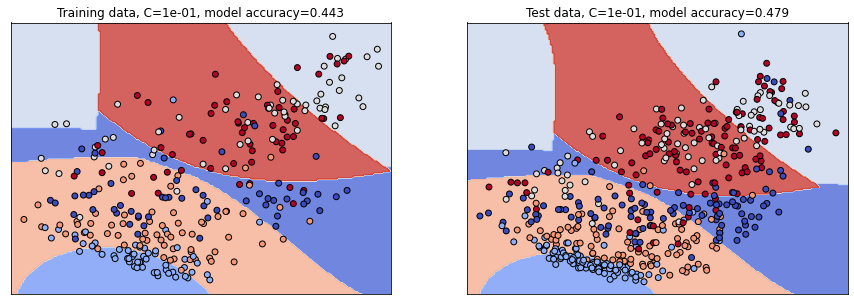

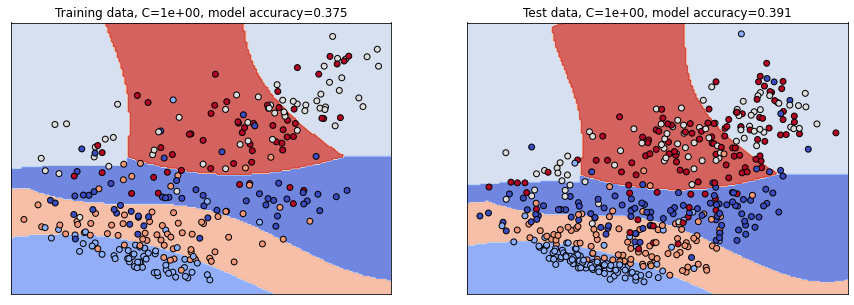

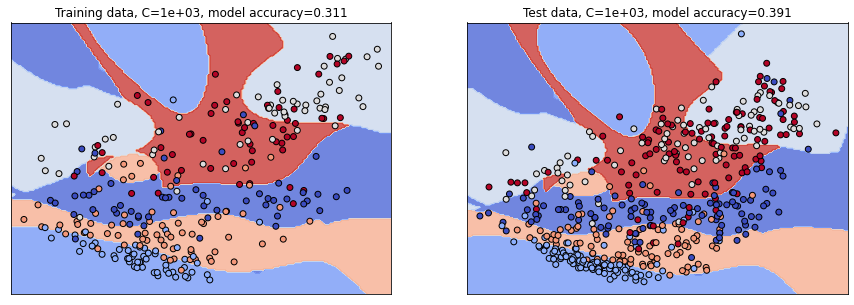

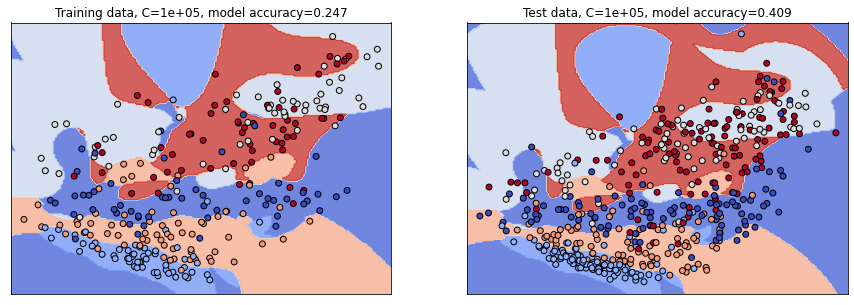

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data further reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    my_svm = SVC(C=C, kernel='rbf', gamma=gamma)
    my_svm.fit(X_train_pca, y_train_plot)
    train_error = (1-my_svm.score(X_train_pca,y_train_plot))
    test_error = (1-my_svm.score(X_test_pca,y_test_plot))
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_error, test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

Bigger and bigger values of C lead to overfit

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


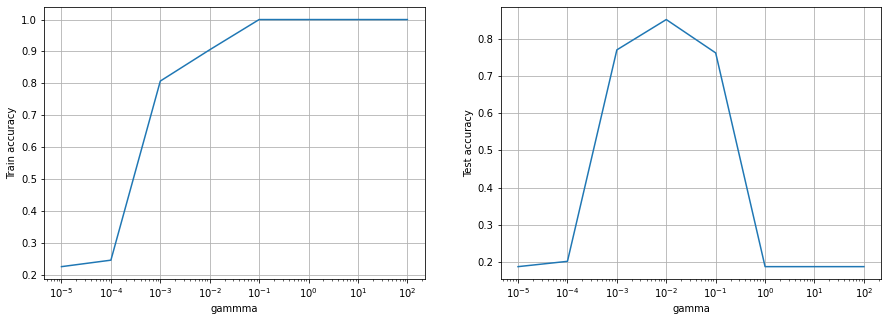

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for gamma in gamma_values:
    svm = SVC(C=1, kernel='rbf', gamma=gamma)
    svm.fit(X_train_plot, y_train_plot)
    train_acc_list.append(svm.score(X_train_plot,y_train_plot))
    test_acc_list.append(svm.score(X_test_plot,y_test_plot))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

As expected, the train accuracy always increases as gamma increases, while the test accuracy rises until gamma becomes too big, then drops as overfit occurs.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [137 159 130 165 136 154 147 171 164 137]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C=rbf_param['C'], kernel='rbf', gamma=rbf_param['gamma'])    # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = (1-best_SVM.score(X_train,y_train))
test_error = (1-best_SVM.score(X_test,y_test))

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.061333
Best SVM test error: 0.172205


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, max_iter=500) #a large C disables regularization
logreg.fit(X_train, y_train)

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.214838


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:
logreg = linear_model.LogisticRegression(C=1, max_iter=600) #a large C disables regularization
logreg.fit(X_train, y_train)

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.008000
Best regularized logistic regression test error: 0.191282


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

The SVM with m=1500 leads to a better result than the one obtained with m=600, as the best error of the former is less than the error of the latter. The result of SVM is also better than the one of Logistic Regression.

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

27
INPUT:


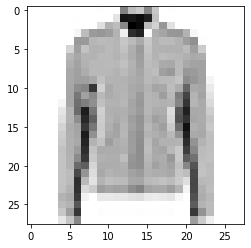

LABEL: 4


In [21]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

for i in range(m_test):
    if LR_prediction[i]!=y_test[i] and SVM_prediction[i]==y_test[i]:
        print(i)
        plot_input(X_train,y_train,i)
        break

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, best_SVM.predict(X_test)) 
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, logreg.predict(X_test))
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5863 5841 5870 5835 5864 5846 5853 5829 5836 5863]

 Confusion matrix SVM  
 
 [[4735   16   96  473   17    6  436    0   81    3]
 [  24 5490   58  242    4    1   19    0    2    1]
 [ 132    6 4094   80  890    2  632    0   34    0]
 [ 179   56   42 5284  125    0  137    0   12    0]
 [  29   11  466  358 4361    1  616    0   21    1]
 [   4    0    0    4    0 5160    1  458   29  190]
 [1053   16  729  331  493    1 3132    0   97    1]
 [   0    0    0    1    0  263    0 5201   10  354]
 [  33    8   76   68   17   35  123   28 5443    5]
 [   0    0    1    1    0   84    0  249    2 5526]]

 Confusion matrix SVM (normalized)   
 
 [[0.81 0.   0.02 0.08 0.   0.   0.07 0.   0.01 0.  ]
 [0.   0.94 0.01 0.04 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.7  0.01 0.15 0.   0.11 0.   0.01 0.  ]
 [0.03 0.01 0.01 0.91 0.02 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.08 0.06 0.74 0.   0.11 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.88 0.   0.08 0. 

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Some items are more similar to others. For example, it is easier to label a t-shirt as a shirt or as a dress, while it is easier to distinguish a bag from any other item in the dataset. This is why some classes have lower accuracies than others.